## ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [15]:
Frvids = pd.read_csv('FRvideos_Clean.csv')
Frvids = Frvids.drop(columns=['Unnamed: 0'])

In [16]:
Frvids.loc[Frvids['likes']==0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_title
8,LhjhGOBIoHM,2017-11-14,Jérémy Ferrari - On n'est pas couché 11 novemb...,On n'est pas couché,24,2017-12-11,"onpc""|""on n'est pas couche""|""laurent ruquier""|...",294065,0,0,0,https://i.ytimg.com/vi/LhjhGOBIoHM/default.jpg,True,True,False,Jérémy Ferrari - On n'est pas couché 11 novemb...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755),Entertainment
98,MhDbAS6EQQ0,2017-11-14,Extrait d'un match entre les U15 féminines de ...,Jeremy LAUGIER,22,2017-11-11,[none],2100,0,0,0,https://i.ytimg.com/vi/MhDbAS6EQQ0/default.jpg,False,False,False,Les U15 de l'AS Buers Villeurbanne égalisent s...,Auvergne,45.779982,3.080008,POINT (3.080008096 45.77998212),People & Blogs
236,IxSMSUYyZqk,2017-11-15,Barakah Feat El Primo - Jurassic Trap,VLA Barakah,10,2017-11-13,"rap""|""rapfrancais""|""hip hop""|""barakah""|""rhoff""...",5123,0,0,24,https://i.ytimg.com/vi/IxSMSUYyZqk/default.jpg,False,True,False,Facebook Barakah : https://www.facebook.com/V...,Amapa,3.910471,-51.810001,POINT (-51.81000065 3.9104706),Music
240,LhjhGOBIoHM,2017-11-15,Jérémy Ferrari - On n'est pas couché 11 novemb...,On n'est pas couché,24,2017-12-11,"onpc""|""on n'est pas couche""|""laurent ruquier""|...",331092,0,0,0,https://i.ytimg.com/vi/LhjhGOBIoHM/default.jpg,True,True,False,Jérémy Ferrari - On n'est pas couché 11 novemb...,Champagne Ardenne,48.340394,4.083358,POINT (4.083357705 48.34039431),Entertainment
256,dK4BI6l-ScE,2017-11-15,Marché de Noël : Audience au Tribunal Administ...,CLNEWS,25,2017-11-14,"CLNEWS clement Lanot""|""news""|""actu""|""france",2707,0,0,0,https://i.ytimg.com/vi/dK4BI6l-ScE/default.jpg,True,True,False,TOUT USAGE COMMERCIAL OU NON COMMERCIAL STRICT...,Rhone Alpes,45.899975,6.116670,POINT (6.116670287 45.89997479),News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35177,1cXwHfPiLss,2018-11-06,Brasil 3 x 0 Áustria - Gols & Melhores Momento...,Lances Futebol,17,2018-10-06,[none],704540,0,0,1538,https://i.ytimg.com/vi/1cXwHfPiLss/default.jpg,False,True,False,"Brasil x Áustria, Brasil vs Áustria , Brasil x...",Martinique,14.610412,-61.080029,POINT (-61.08002914 14.6104118),Sports
35352,8MTYGWrroqI,2018-12-06,سو Ep 4 Ramdan الحلقة الرابعة رمضان JAMAL AZZA TV,AYMANE HAMIDI Vlogs,22,2018-10-06,#Souhlifa #Aloula #Ramadan #2m #Telemaroc,131877,0,0,0,https://i.ytimg.com/vi/8MTYGWrroqI/default.jpg,True,True,False,Pag youtube Jamal Azza : https://www.youtube.c...,Basse Normandie,49.650392,-1.649987,POINT (-1.649987428 49.65039187),People & Blogs
35518,hAT-lYVgLtk,2018-06-13,قناة مكة - القران الكريم - مباشر Quran Makkah...,mp3quran Website,27,2018-06-13,quran makkah live stream قناة القران الكريم مك...,64694,0,0,11,https://i.ytimg.com/vi/hAT-lYVgLtk/default.jpg,False,True,False,قناة القران الكريم السعودية مباشريمكنكم مشاهدة...,Guinaa,4.729981,-52.330021,POINT (-52.33002059 4.729981302),Education
35605,i6i0qShs-TE,2018-06-14,Idée de buffet à la Marocaine | Recettes : Deu...,SANAMAKEUP,22,2018-06-13,"sanamakeup|""youtubeuse""|""beauté""|""marocaine""|""...",22922,0,0,332,https://i.ytimg.com/vi/i6i0qShs-TE/default.jpg,False,True,False,▃▃▃▃▃▃ Déroule la barre d'infos ▃▃▃▃▃▃⚠️‼️Abon...,Guinaa,4.729981,-52.330021,POINT (-52.33002059 4.729981302),People & Blogs


In [17]:
varialbes = Frvids
varialbes.drop(['video_id','trending_date','title','channel_title','category_id','publish_time','tags'
,'thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'
,'state','lat','lon','geometry','category_title'],axis='columns', inplace=True)


In [18]:
varialbes['likes'].mean()

7695.374047939068

In [19]:
X = Frvids[['views','dislikes','comment_count']]
y = Frvids['likes']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [0.01006135 4.77985676 7.31983909]
El término independiente de la recta 'w0' es:  -637.91692975362


In [26]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.010061
dislikes,4.779857
comment_count,7.319839


In [27]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Y Predichos')

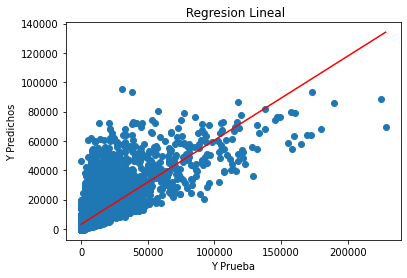

In [39]:
plt.scatter(y_test,predictions)
plt.title(" Regresion Lineal")
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)), color='r')
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

Text(0.5, 1.0, 'Cantidad de residuo por video')

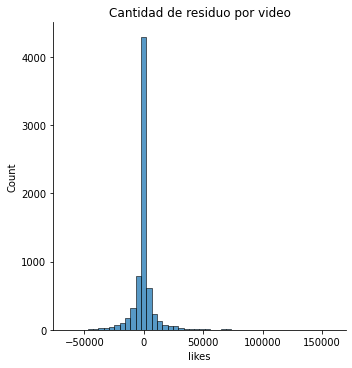

In [29]:
sns.displot((y_test-predictions),bins=50);
plt.title("Cantidad de residuo por video")

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5024.686346716741
MSE: 121283400.82974611
RMSE: 11012.87432189009


## ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?


In [32]:
media_like=Frvids['likes'].mean()
media_dislike=Frvids['dislikes'].mean()


In [33]:
def analize_sentiment(comment):
    if comment > media_like:
        return 1
    else:
        return 0

In [34]:
Frvids['polaridad'] = np.array([analize_sentiment(comment) for comment in Frvids['likes']])
Frvids.head()

,views,likes,dislikes,comment_count,polaridad
0,212702,29282,1108,3817,1
1,432721,14053,576,1161,1
2,925222,85016,550,4303,1
3,141695,8091,72,481,1
4,141253,14354,202,417,1


In [35]:
pos_com= [ i for index, i in enumerate(Frvids['likes']) if Frvids['polaridad'][index] > 0]
neg_com = [ i for index, i in enumerate(Frvids['likes']) if Frvids['polaridad'][index] == 0]

In [36]:
print("Percentaje de positivos : {}%".format(len(pos_com)*100/len(Frvids['likes'])))
print("Percentaje de negativos : {}%".format(len(neg_com)*100/len(Frvids['likes'])))

Percentaje de positivos : 23.25548835125448%
Percentaje de negativos : 76.74451164874552%


0    27407
1     8305
Name: polaridad, dtype: int64


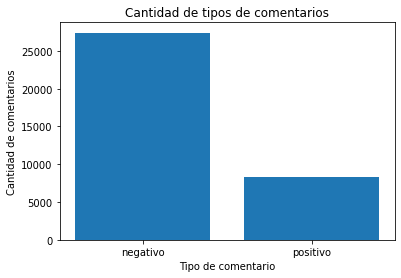

In [37]:
cantidad = Frvids['polaridad'].value_counts()
plt.xticks(rotation='horizontal')
plt.bar(['negativo','positivo'], cantidad.values)
plt.title("Cantidad de tipos de comentarios")
plt.xlabel("Tipo de comentario")
plt.ylabel("Cantidad de comentarios")

print(cantidad)

In [38]:
X_text=['asd']